In [43]:
from PIL import Image
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

def greyscale_from_array(im, brightening_factor=1):
    #stack the three channels side by side
    rgb = np.hstack((im[::,::,0:1:],im[::,::,1:2:],im[::,::,2:3:]))

    #change each list of one integer to just that integer
    rgb_fixed = np.zeros((rgb.shape[0], rgb.shape[1]))
    for i in range(rgb.shape[0]):
        for j in range(rgb.shape[1]):
            rgb_fixed[i][j] = rgb[i][j][0]*brightening_factor

    #return the greyscale image
    return rgb_fixed

def load_images_to_dict(folder="train"):
    #for switching between "train", "test", and "valid" folders
    path = (folder + "/" + folder)

    #makes a dictionary mapping species to all the files in that folder
    directories = {}
    for species_file in os.listdir(path):
        directories[species_file] = os.listdir(path  + "/" + species_file)

    #makes a dictionary mapping species to arrays for each image in that folder
    #looks like images[species] = [MxNarray, MxNarray, ..., MxNarray]
    images = {}
    for directory in directories.keys():
        images[directory] = []
        for file in os.listdir(path + "/" + directory): 
            images[directory].append(np.array(Image.open(path + "/" + directory + "/" + file).convert("L")))

    #return that dictionary
    return images

train_images = load_images_to_dict()
test_images = load_images_to_dict("test")

In [44]:
train_group = train_images["Chinar"]
test_group = test_images["Chinar"]

X = []
y = []

for key, value in train_images.items():
    for image in value:
        X.append(image)
        if key == "Chinar":
            y.append(1)
        else:
            y.append(0)

X_test = []
y_test = []
for key, value in test_images.items():
    for image in value:
        X_test.append(image)
        if key == "Chinar":
            y_test.append(1)
        else:
            y_test.append(0)


y = np.array(y)
X = np.array(X)
X = np.reshape(X, (X.shape[0], X.shape[1]*X.shape[2]))

y_test = np.array(y_test)
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1]*X_test.shape[2]))

neighbors = np.arange(1, 110)
test_accuracy = np.empty(len(neighbors))
train_accuracy = np.empty(len(neighbors))
# Loop over K values
for i, k in enumerate(neighbors):
    # KNN classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X, y)
    train_accuracy[i] = knn.score(X, y)
    test_accuracy[i] = knn.score(X_test, y_test)
    # Predictions on the test set
    predictions = knn.predict(X_test)
    # Accuracy of the model
    accuracy = accuracy_score(y_test, predictions)
# for i in range(y_test.shape[0]):
#     print(str(predictions[i]) + " is really: " + str(y_test[i]))

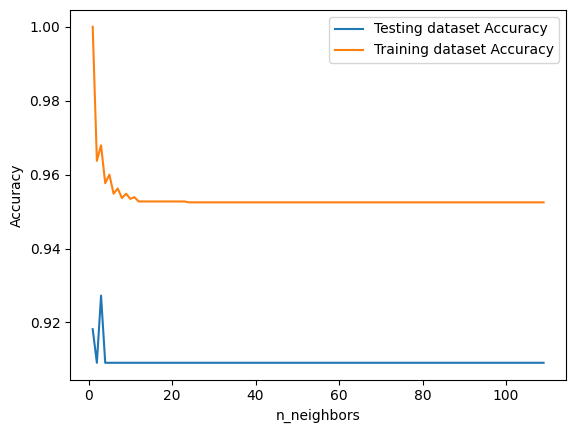

In [46]:
# Plot 
plt.plot(neighbors, test_accuracy, label = "Testing dataset Accuracy")
plt.plot(neighbors, train_accuracy, label = "Training dataset Accuracy")
plt.legend()
plt.xlabel("n_neighbors")
plt.ylabel("Accuracy")
plt.show()